In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# purchase_frequency_data = {
#     'PurchaseFrequency': [3.0, 3.5, 4.0, 4.2, 4.3, 4.4, 4.5, 4.6, 4.6, 4.5],
#     'ProductSubcategory': ['Mountain Bikes', 'Road Bikes', 'Hybrid Bikes', 'Hybrid Bikes', 'BMX Bikes',
#                             'Mountain Bikes', 'Road Bikes', 'Hybrid Bikes', 'Hybrid Bikes', 'BMX Bikes'],
#     'Color': ['Silver', 'Black', 'Red', 'Blue', 'White', 'Silver', 'Black', 'Red', 'Blue', 'White'],
#     'SalesDate': ['2023-11-05', '2023-07-21', '2022-12-15', '2022-09-30', '2022-06-14', '2021-08-09', '2021-04-18', 
#                    '2020-11-25', '2020-07-30', '2020-03-08']
# }

# df_PurchaseFrequency = pd.DataFrame(purchase_frequency_data)



In [4]:
# churn_risk_score_data = {
#     'ChurnRiskScore': [0.15, 0.14, 0.13, 0.12, 0.11, 0.11, 0.12, 0.13, 0.12, 0.12],
#     'Region': ['Northwest', 'Northeast', 'Midwest', 'South', 'West', 'Northwest', 'Northeast', 'Midwest', 'South', 'Northwest'],
#     'Segment': ['Individual', 'Corporate', 'Individual', 'Individual', 'Individual', 'Corporate', 'Individual', 
#                 'Corporate', 'Individual', 'Individual']
# }

# df_ChurnRiskScore = pd.DataFrame(churn_risk_score_data)

In [5]:
# cltv_data = {
#     'CLTV': [1200.0, 1250.0, 1300.0, 1350.0, 1400.0, 1450.0, 1475.0, 1490.0, 1495.0, 1500.0],
#     'Segment': ['Individual', 'Corporate', 'Individual', 'Corporate', 'Corporate', 'Corporate', 'Corporate', 
#                 'Corporate', 'Individual', 'Corporate'],
#     'IncomeBracket': ['Low', 'Low-Medium', 'Medium', 'Medium-High', 'High', 'Medium-High', 'Low-Medium', 'Medium', 'Medium-High', 'Medium-High']
# }

# df_CLTV = pd.DataFrame(cltv_data)


In [6]:
# aov_data = {
#     'AOV': [100.0, 105.0, 110.0, 115.0, 120.0, 125.0, 130.0, 132.0, 134.0, 135.8],
#     'AgeGroup': ['18-24', '25-34', '35-44', '45-54', '55+', '18-24', '25-34', '35-44', '45-54', '55+'],
#     'PaymentType': ['Credit Card', 'Cash', 'Check', 'Online', 'Credit Card', 'Online', 'Online', 'Online', 'Credit Card', 'Cash'],
#     'IncomeBracket': ['Low', 'Low-Medium', 'Medium', 'Medium-High', 'High', 'Low', 'Low-Medium', 'Medium', 'Medium-High', 'High']
# }

# df_AOV = pd.DataFrame(aov_data)


In [7]:
# revenue_data = {
#     'Revenue': [450000.0, 460000.0, 470000.0, 480000.0, 490000.0, 495000.0, 500000.0, 510000.0, 520000.0, 530000.0],
#     'Region': ['Northwest', 'Northeast', 'Northwest', 'Northwest', 'West', 'Northwest', 'Northeast', 'Midwest', 'South', 'West'],
#     'Segment': ['Individual', 'Corporate', 'Individual', 'Corporate', 'Individual', 'Corporate', 'Individual', 
#                 'Corporate', 'Individual', 'Corporate'],
#     'ProductCategory': ['Bikes', 'Components', 'Bikes', 'Accessories', 'Helmets', 'Bikes', 'Components', 
#                          'Clothing', 'Bikes', 'Helmets']
# }



In [8]:
def calculate_correlation_for_metric_and_dimensions(metric, dimensions):
    mapping = {
    'Revenue': df_Revenue,
    'AOV': df_AOV,
    'CLTV':df_CLTV,
    'ChurnRiskScore':df_ChurnRiskScore,
    'PurchaseFrequency':df_PurchaseFrequency
    }
    if metric not in mapping:
        raise ValueError(f"Metric '{metric}' not found in the mapping.")
    
    df = mapping[metric]
    
    selected_columns = [metric] + [dim for dim in dimensions if dim in df.columns]
    
    if len(selected_columns) < 2:
        raise ValueError("Not enough valid columns found in the DataFrame for correlation calculation.")
    
    df_selected = df[selected_columns].copy()
    
    # Encoding non-numeric columns
    for col in df_selected.columns:
        if not pd.api.types.is_numeric_dtype(df_selected[col]):
            df_selected[col] = df_selected[col].astype('category').cat.codes
    
    correlation_matrix = df_selected.corr()
    correlation_matrix.drop([metric],axis=1,inplace=True)
    return correlation_matrix.loc[metric]

metric = 'Revenue'
dimensions = ['Region', 'Segment', 'ProductCategory']

try:
    correlations = calculate_correlation_for_metric_and_dimensions(metric, dimensions)
    print(f"Correlations for metric '{metric}':")
    print(correlations)
except ValueError as e:
    print(f"Error: {e}")

NameError: name 'df_Revenue' is not defined

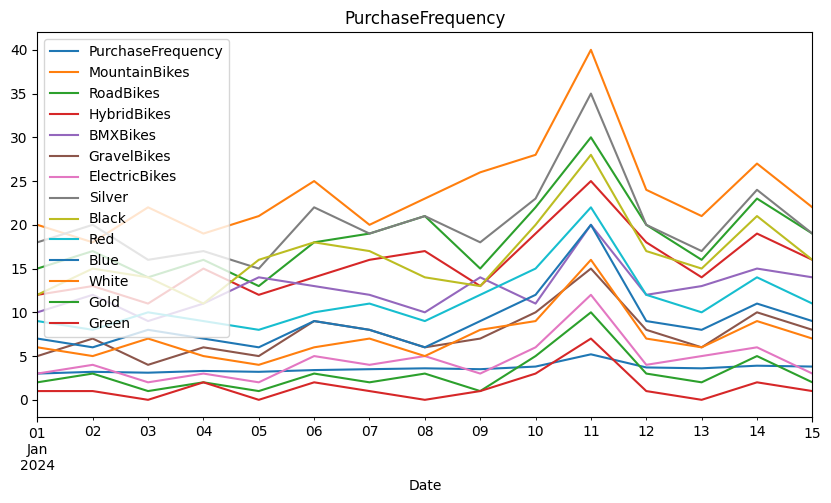

In [33]:
df_PurchaseFrequency= pd.read_csv("PurchaseFrequency.csv")
df_PurchaseFrequency["Date"]=pd.date_range(start='2024-01-01', periods=15, freq='D')
df_PurchaseFrequency.set_index('Date', inplace=True)
df_PurchaseFrequency=df_PurchaseFrequency.drop(["Day"],axis=1)
df_PurchaseFrequency.plot(figsize=(10, 5), title="PurchaseFrequency")
plt.show()

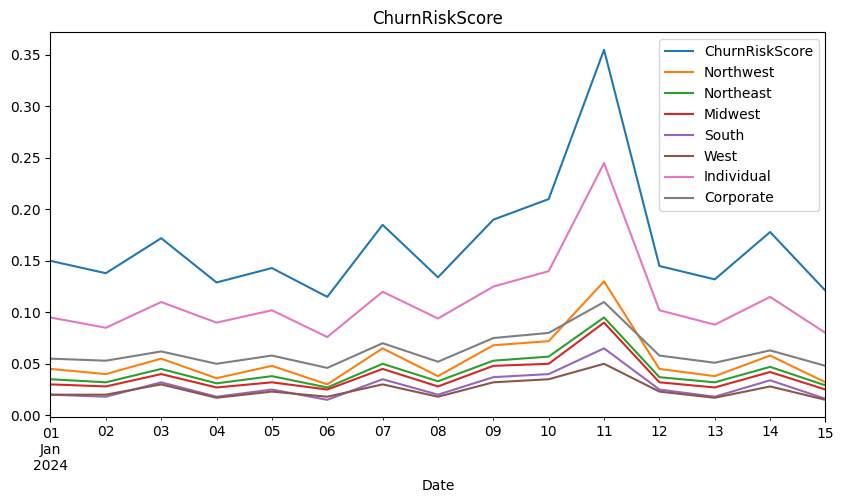

In [31]:
df_ChurnRiskScore= pd.read_csv("ChurnRiskScore.csv")
df_ChurnRiskScore["Date"]=pd.date_range(start='2024-01-01', periods=15, freq='D')
df_ChurnRiskScore.set_index('Date', inplace=True)
df_ChurnRiskScore=df_ChurnRiskScore.drop(["Day"],axis=1)
df_ChurnRiskScore.plot(figsize=(10, 5), title="ChurnRiskScore")
plt.show()

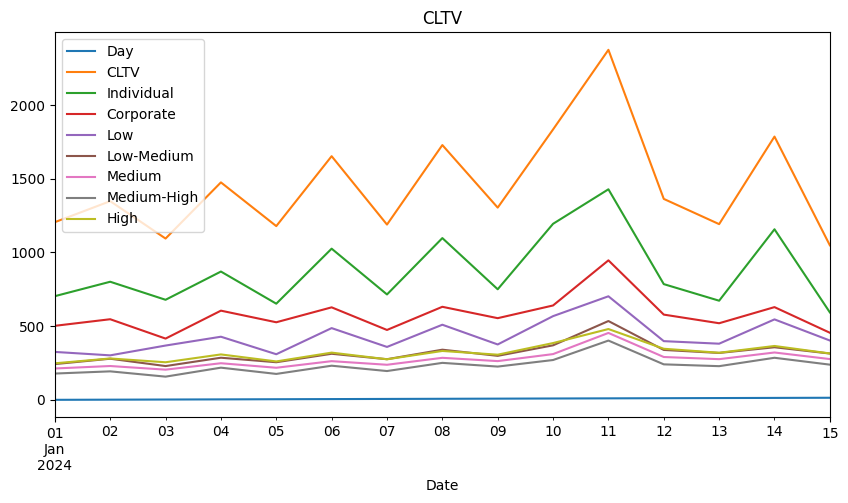

In [28]:
df_CLTV= pd.read_csv("CLTV.csv")
df_CLTV["Date"]=pd.date_range(start='2024-01-01', periods=15, freq='D')
df_CLTV.set_index('Date', inplace=True)
df_CLTV.plot(figsize=(10, 5), title="CLTV")
plt.show()

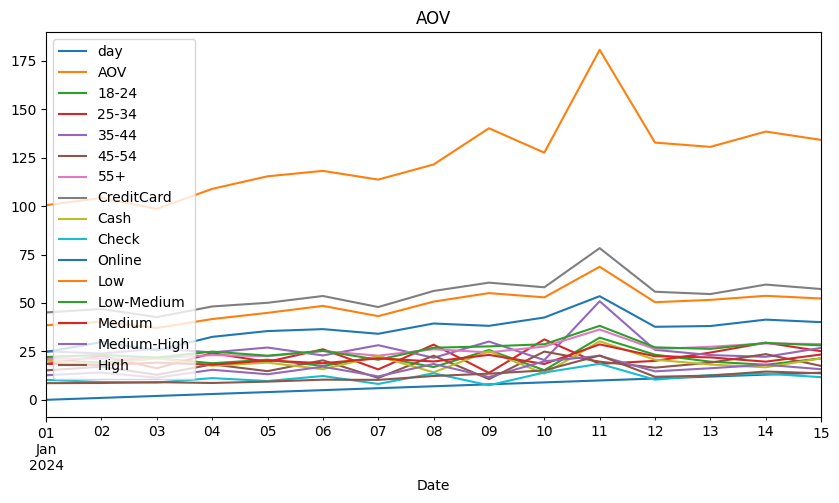

In [9]:
df_AOV= pd.read_csv("AOV.csv")
df_AOV["Date"]=pd.date_range(start='2024-01-01', periods=15, freq='D')
df_AOV.set_index('Date', inplace=True)
df_AOV.plot(figsize=(10, 5), title="AOV")
plt.show()

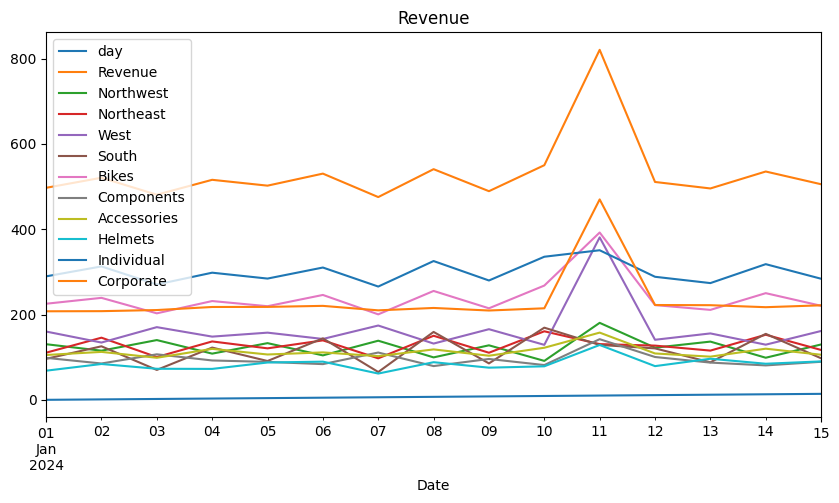

In [10]:
df_Revenue = pd.read_csv("revenue.csv")
df_Revenue["Date"]=pd.date_range(start='2024-01-01', periods=15, freq='D')
df_Revenue.set_index('Date', inplace=True)
df_Revenue.plot(figsize=(10, 5), title="Revenue")
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from scipy.stats import pearsonr
from scipy.spatial.distance import euclidean
from dtaidistance import dtw
import pandas as pd

def check_stationarity(df):
    """ Check stationarity using ADF Test. Apply differencing if needed. """
    res1 = adfuller(df.iloc[:, 0]) 
    res2 = adfuller(df.iloc[:, 1])  

    print(f"ADF Statistic (Revenue): {res1[0]}, p-value: {res1[1]}")
    print(f"ADF Statistic ({df.columns[1]}): {res2[0]}, p-value: {res2[1]}")

    if res1[1] > 0.05 or res2[1] > 0.05:
        print("❌ Time series is NOT stationary, applying differencing")
        return df.diff().dropna()  # Apply first-order differencing
    else:
        print("✅ Time series is stationary")
        return df

cols = ['Northwest', 'Northeast', 'West', 'South', 'Bikes',
        'Components', 'Accessories', 'Helmets', 'Individual', 'Corporate']

cols = ['Northwest', 'Northeast', 'West', 'South', 'Bikes',
        'Components', 'Accessories', 'Helmets', 'Individual', 'Corporate']

results = []

for col in cols:
    df_pair = df_Revenue[['Revenue', col]].dropna()
    df_pair = check_stationarity(df_pair) 

    # Compute Similarity Metrics
    corr, corr_p_value = pearsonr(df_pair.iloc[:, 0], df_pair.iloc[:, 1])  # Pearson Correlation
    dtw_distance = dtw.distance(df_pair.iloc[:, 0], df_pair.iloc[:, 1])  # DTW Distance
    euclidean_distance = euclidean(df_pair.iloc[:, 0], df_pair.iloc[:, 1])  # Euclidean Distance

    # Compute Granger Causality
    max_lags = 3
    granger_results = grangercausalitytests(df_pair, max_lags, verbose=False)
    granger_p_values = [granger_results[lag][0]['ssr_chi2test'][1] for lag in range(1, max_lags + 1)]
    
    best_granger_p = min(granger_p_values)

    # Store results
    results.append({
        'Variable': col,
        'Pearson Correlation': corr,
        'Correlation p-value': corr_p_value,
        'DTW Distance': dtw_distance,
        'Euclidean Distance': euclidean_distance,
        'Best Granger p-value': best_granger_p
    })

df_results = pd.DataFrame(results)



KeyError: "['revenue'] not in index"

In [55]:
df_results

,Variable,Pearson Correlation,Correlation p-value,DTW Distance,Euclidean Distance,Best Granger p-value
0,Northwest,0.497086,5.940728e-02,1603.154117,1603.154117,0.000205
1,Northeast,0.297663,2.812599e-01,1591.609766,1591.609766,0.009277
2,West,0.874606,1.990596e-05,1408.344384,1425.783243,0.069598
3,South,0.374426,1.691370e-01,1639.994346,1639.994346,0.001498
4,Bikes,0.984062,3.914171e-11,1128.808215,1137.951400,0.000041
5,Components,0.536761,4.781223e-02,353.739228,393.458254,0.120312
6,Accessories,0.950369,5.805626e-08,1641.735858,1641.735858,0.316295
7,Helmets,0.839878,8.933829e-05,1753.395729,1753.395729,0.288014
8,Individual,0.755473,1.125382e-03,932.860912,932.860912,0.000111
9,Corporate,0.967852,3.600048e-09,1105.716457,1162.337696,0.000104


In [56]:
df_results_similarity = df_results.sort_values(by='Pearson Correlation', ascending=False)
df_results_similarity


,Variable,Pearson Correlation,Correlation p-value,DTW Distance,Euclidean Distance,Best Granger p-value
4,Bikes,0.984062,3.914171e-11,1128.808215,1137.951400,0.000041
9,Corporate,0.967852,3.600048e-09,1105.716457,1162.337696,0.000104
6,Accessories,0.950369,5.805626e-08,1641.735858,1641.735858,0.316295
2,West,0.874606,1.990596e-05,1408.344384,1425.783243,0.069598
7,Helmets,0.839878,8.933829e-05,1753.395729,1753.395729,0.288014
8,Individual,0.755473,1.125382e-03,932.860912,932.860912,0.000111
5,Components,0.536761,4.781223e-02,353.739228,393.458254,0.120312
0,Northwest,0.497086,5.940728e-02,1603.154117,1603.154117,0.000205
3,South,0.374426,1.691370e-01,1639.994346,1639.994346,0.001498
1,Northeast,0.297663,2.812599e-01,1591.609766,1591.609766,0.009277


In [58]:
df_results_causality = df_results.sort_values(by='Best Granger p-value')
df_results_causality


,Variable,Pearson Correlation,Correlation p-value,DTW Distance,Euclidean Distance,Best Granger p-value
4,Bikes,0.984062,3.914171e-11,1128.808215,1137.951400,0.000041
9,Corporate,0.967852,3.600048e-09,1105.716457,1162.337696,0.000104
8,Individual,0.755473,1.125382e-03,932.860912,932.860912,0.000111
0,Northwest,0.497086,5.940728e-02,1603.154117,1603.154117,0.000205
3,South,0.374426,1.691370e-01,1639.994346,1639.994346,0.001498
1,Northeast,0.297663,2.812599e-01,1591.609766,1591.609766,0.009277
2,West,0.874606,1.990596e-05,1408.344384,1425.783243,0.069598
5,Components,0.536761,4.781223e-02,353.739228,393.458254,0.120312
7,Helmets,0.839878,8.933829e-05,1753.395729,1753.395729,0.288014
6,Accessories,0.950369,5.805626e-08,1641.735858,1641.735858,0.316295


In [71]:
top_pearson = df_results.nlargest(2, 'Pearson Correlation')[['Variable', 'Pearson Correlation']]
top_granger = df_results.nsmallest(2, 'Best Granger p-value')[['Variable', 'Best Granger p-value']]

top_results = {
        "Top 2 Pearson Correlation Variables": top_pearson.to_dict(orient='records'),
        "Top 2 Granger Causality Variables": top_granger.to_dict(orient='records')
    }

df=pd.DataFrame(top_results)
df.to



,Top 2 Pearson Correlation Variables,Top 2 Granger Causality Variables
0,"{'Variable': 'Bikes', 'Pearson Correlation': 0...","{'Variable': 'Bikes', 'Best Granger p-value': ..."
1,"{'Variable': 'Corporate', 'Pearson Correlation...","{'Variable': 'Corporate', 'Best Granger p-valu..."


In [1]:
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from scipy.stats import pearsonr
from scipy.spatial.distance import euclidean
from dtaidistance import dtw
import pandas as pd

def check_stationarity(df):
    """ Check stationarity using ADF Test. Apply differencing if needed. """
    res1 = adfuller(df.iloc[:, 0]) 
    res2 = adfuller(df.iloc[:, 1])  

    print(f"ADF Statistic (Revenue): {res1[0]}, p-value: {res1[1]}")
    print(f"ADF Statistic ({df.columns[1]}): {res2[0]}, p-value: {res2[1]}")

    if res1[1] > 0.05 or res2[1] > 0.05:
        print("❌ Time series is NOT stationary, applying differencing")
        return df.diff().dropna()  # Apply first-order differencing
    else:
        print("✅ Time series is stationary")
        return df

cols = [col for col in df_AOV.columns if col not in [metric, 'day']]

results = []

for col in cols:
    df_pair = df_AOV[['AOV', col]].dropna()
    df_pair = check_stationarity(df_pair) 

    # Compute Similarity Metrics
    corr, corr_p_value = pearsonr(df_pair.iloc[:, 0], df_pair.iloc[:, 1])  # Pearson Correlation
    dtw_distance = dtw.distance(df_pair.iloc[:, 0], df_pair.iloc[:, 1])  # DTW Distance
    euclidean_distance = euclidean(df_pair.iloc[:, 0], df_pair.iloc[:, 1])  # Euclidean Distance

    # Compute Granger Causality
    max_lags = 3
    granger_results = grangercausalitytests(df_pair, max_lags, verbose=False)
    granger_p_values = [granger_results[lag][0]['ssr_chi2test'][1] for lag in range(1, max_lags + 1)]
    
    best_granger_p = min(granger_p_values)

    # Store results
    results.append({
        'Variable': col,
        'Pearson Correlation': corr,
        'Correlation p-value': corr_p_value,
        'DTW Distance': dtw_distance,
        'Euclidean Distance': euclidean_distance,
        'Best Granger p-value': best_granger_p
    })

df_results = pd.DataFrame(results)



NameError: name 'df_AOV' is not defined